In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pickle

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [3]:
df_purchase=pd.read_csv('purchase data.csv')

In [4]:
df_purchase.head(5)

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


In [5]:
df_purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58693 entries, 0 to 58692
Data columns (total 24 columns):
ID                   58693 non-null int64
Day                  58693 non-null int64
Incidence            58693 non-null int64
Brand                58693 non-null int64
Quantity             58693 non-null int64
Last_Inc_Brand       58693 non-null int64
Last_Inc_Quantity    58693 non-null int64
Price_1              58693 non-null float64
Price_2              58693 non-null float64
Price_3              58693 non-null float64
Price_4              58693 non-null float64
Price_5              58693 non-null float64
Promotion_1          58693 non-null int64
Promotion_2          58693 non-null int64
Promotion_3          58693 non-null int64
Promotion_4          58693 non-null int64
Promotion_5          58693 non-null int64
Sex                  58693 non-null int64
Marital status       58693 non-null int64
Age                  58693 non-null int64
Education            58693 non-null int64

In [6]:
df_purchase.isnull().sum()

ID                   0
Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              0
Price_2              0
Price_3              0
Price_4              0
Price_5              0
Promotion_1          0
Promotion_2          0
Promotion_3          0
Promotion_4          0
Promotion_5          0
Sex                  0
Marital status       0
Age                  0
Education            0
Income               0
Occupation           0
Settlement size      0
dtype: int64

In [7]:
df_purchase.nunique()

ID                   500
Day                  730
Incidence              2
Brand                  6
Quantity              16
Last_Inc_Brand         6
Last_Inc_Quantity      2
Price_1               37
Price_2               30
Price_3               21
Price_4               26
Price_5               44
Promotion_1            2
Promotion_2            2
Promotion_3            2
Promotion_4            2
Promotion_5            2
Sex                    2
Marital status         2
Age                   56
Education              4
Income               499
Occupation             3
Settlement size        3
dtype: int64

# Data Segementation

## Import Segmentation Model

In [8]:
scaler=pickle.load(open('scaler.pickle','rb'))

In [9]:
pca=pickle.load(open('pca.pickle','rb'))

In [10]:
kmeans_pca=pickle.load(open('kmeans_pca.pickle','rb'))

## Standardization

In [11]:
features=df_purchase[['Sex','Marital status','Age','Education','Income','Occupation','Settlement size']]
df_purchase_segm_std=scaler.transform(features)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


## PCA

In [12]:
df_purchase_segm_pca=pca.transform(df_purchase_segm_std)

## K-Means PCA

In [13]:
purchase_segm_kmeans_pca=kmeans_pca.predict(df_purchase_segm_pca)

In [14]:
df_purchase_predictors=df_purchase.copy()

In [15]:
df_purchase_predictors['Segments']=purchase_segm_kmeans_pca

# Descriptive Analysis by Segments

## Data Analysis by Customer

In [16]:
df_purchase_predictors.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segments
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,2
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,2
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2


In [17]:
temp1=df_purchase_predictors[['ID','Quantity']].groupby(['ID'],as_index=False).count()#instead of quantity we can give anything here answer will be same as there are no nul values and so for all ids some value is there 
temp1=temp1.set_index('ID')
temp1=temp1.rename(columns={'Quantity':'N_Visits'})
temp1.head()

,N_Visits
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111


In [18]:
temp2=df_purchase_predictors[['ID','Incidence']].groupby(['ID'],as_index=False).sum()#instead of quantity we can give anything here answer will be same as there are no nul values and so for all ids some value is there 
temp2=temp2.set_index('ID')
temp2=temp2.rename(columns={'Incidence':'N_Purchases'})
temp3=temp1.join(temp2)
temp3.head()

,N_Visits,N_Purchases
ID,,
200000001,101,9
200000002,87,11
200000003,97,10
200000004,85,11
200000005,111,13


In [19]:
temp3['Average_N_Purchases']=temp3['N_Purchases']/temp3['N_Visits']
temp3.head()

,N_Visits,N_Purchases,Average_N_Purchases
ID,,,
200000001,101,9,0.089109
200000002,87,11,0.126437
200000003,97,10,0.103093
200000004,85,11,0.129412
200000005,111,13,0.117117


In [20]:
temp4=df_purchase_predictors[['ID','Segments']].groupby(['ID'],as_index=False).mean()#instead of quantity we can give anything here answer will be same as there are no nul values and so for all ids some value is there 
temp4=temp4.set_index('ID')
df_purchase_descr=temp3.join(temp4)
df_purchase_descr.head()

,N_Visits,N_Purchases,Average_N_Purchases,Segments
ID,,,,
200000001,101,9,0.089109,2
200000002,87,11,0.126437,3
200000003,97,10,0.103093,2
200000004,85,11,0.129412,2
200000005,111,13,0.117117,1


In [21]:
segm_prop=df_purchase_descr[['N_Purchases','Segments']].groupby(['Segments']).count()/df_purchase_descr.shape[0]
segm_prop=segm_prop.rename(columns={'N_Purchases':'Segment Proportions'})
segm_prop

,Segment Proportions
Segments,
0,0.206
1,0.220
2,0.378
3,0.196


Text(0.5, 1.0, 'Segment Proportions')

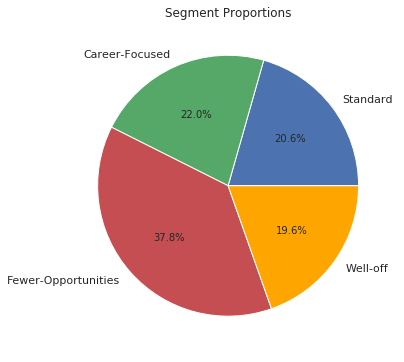

In [22]:
plt.figure(figsize=(9,6))
plt.pie(segm_prop['Segment Proportions'],
       labels=['Standard','Career-Focused','Fewer-Opportunities','Well-off'],
       autopct='%1.1f%%',
       colors=('b','g','r','orange'))
plt.title('Segment Proportions')

## Purchase Occasion And Purchase Incidence

## Three questions-1.How often people from different segments visit the store
##                              2.How often client buys the product
## 3.What is the average no. of purchases for each segments

In [23]:
segments_mean=df_purchase_descr.groupby(['Segments']).mean()
segments_mean

,N_Visits,N_Purchases,Average_N_Purchases
Segments,,,
0,117.699029,24.902913,0.212773
1,123.454545,39.827273,0.283102
2,113.730159,22.756614,0.201588
3,117.295918,34.602041,0.284478


In [24]:
segments_std=df_purchase_descr.groupby(['Segments']).std()
segments_std

,N_Visits,N_Purchases,Average_N_Purchases
Segments,,,
0,19.039605,16.774464,0.126603
1,44.864656,53.744530,0.200056
2,16.410498,13.815040,0.120335
3,20.716152,25.900579,0.171787


Text(0.5, 1.0, 'Average no. of store visits by Segments')

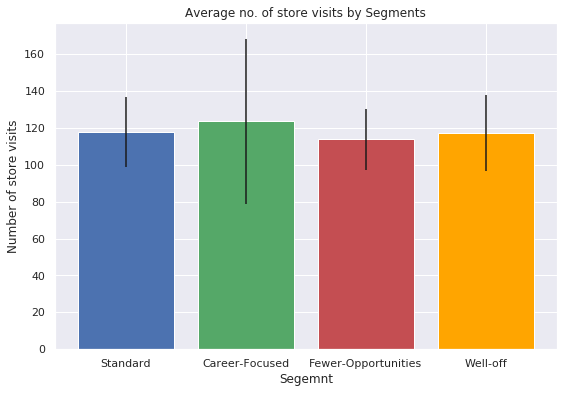

In [25]:
plt.figure(figsize=(9,6))
plt.bar(x=(0,1,2,3),
       tick_label=('Standard','Career-Focused','Fewer-Opportunities','Well-off'),
       height=segments_mean['N_Visits'],
       yerr=segments_std['N_Visits'],
       color=('b','g','r','orange'))
plt.xlabel('Segemnt')
plt.ylabel('Number of store visits')
plt.title('Average no. of store visits by Segments')
#Vertical Line in the bars represent std. errors or deviation bigger line there is more variation in the visiting the store some visit a lot and some visit very less
#small virtical line means they are very consistent

Text(0.5, 1.0, 'No. of puchases by Segments')

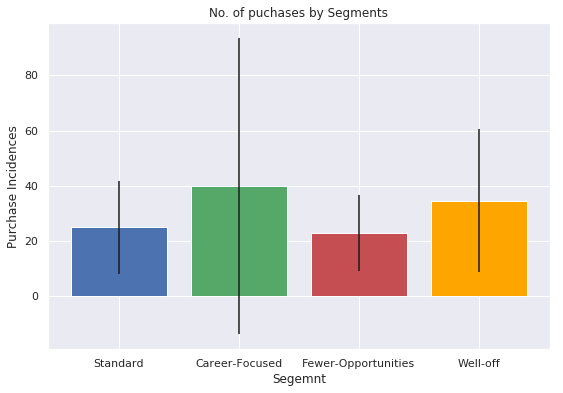

In [26]:
plt.figure(figsize=(9,6))
plt.bar(x=(0,1,2,3),
       tick_label=('Standard','Career-Focused','Fewer-Opportunities','Well-off'),
       height=segments_mean['N_Purchases'],
       yerr=segments_std['N_Purchases'],
       color=('b','g','r','orange'))
plt.xlabel('Segemnt')
plt.ylabel('Purchase Incidences')
plt.title('No. of puchases by Segments')
#Vertical Line in the bars represent std. errors or deviation bigger line there is more variation in the buying of the product some buy a lot and some buy very less

Text(0.5, 1.0, 'Average no. of puchases by Segments')

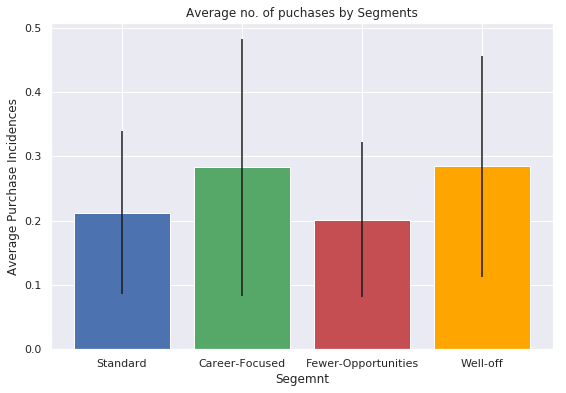

In [27]:
plt.figure(figsize=(9,6))
plt.bar(x=(0,1,2,3),
       tick_label=('Standard','Career-Focused','Fewer-Opportunities','Well-off'),
       height=segments_mean['Average_N_Purchases'],
       yerr=segments_std['Average_N_Purchases'],
       color=('b','g','r','orange'))
plt.xlabel('Segemnt')
plt.ylabel('Average Purchase Incidences')
plt.title('Average no. of puchases by Segments')

## Brand Choice

In [28]:
df_purchase_incidence=df_purchase_predictors[df_purchase_predictors['Incidence']==1]
df_purchase_incidence.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segments
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,0,0,0,0,47,1,110866,1,0,2
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,...,0,1,0,0,47,1,110866,1,0,2
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,1,0,0,0,47,1,110866,1,0,2
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,...,0,0,0,0,47,1,110866,1,0,2
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,...,1,1,0,0,47,1,110866,1,0,2


In [29]:
brand_dummies=pd.get_dummies(df_purchase_incidence['Brand'],prefix='Brand',prefix_sep='_')
brand_dummies.head()

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
6,0,1,0,0,0
11,0,0,0,0,1
19,1,0,0,0,0
24,0,0,0,1,0
29,0,1,0,0,0


In [30]:
brand_dummies['Segments'],brand_dummies['ID']=df_purchase_incidence['Segments'],df_purchase_incidence['ID']
brand_dummies.head()

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Segments,ID
6,0,1,0,0,0,2,200000001
11,0,0,0,0,1,2,200000001
19,1,0,0,0,0,2,200000001
24,0,0,0,1,0,2,200000001
29,0,1,0,0,0,2,200000001


In [31]:
temp=brand_dummies.groupby(['ID'],as_index=True).mean()
temp#we see total 500 different customers(500 different IDs) belong to various segments we made

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Segments
ID,,,,,,
200000001,0.111111,0.444444,0.000000,0.222222,0.222222,2
200000002,0.000000,0.090909,0.000000,0.909091,0.000000,3
200000003,0.000000,0.800000,0.000000,0.000000,0.200000,2
200000004,0.000000,0.090909,0.000000,0.000000,0.909091,2
200000005,0.000000,0.000000,0.000000,0.000000,1.000000,1
200000006,0.100000,0.100000,0.000000,0.000000,0.800000,1
200000007,0.062500,0.500000,0.187500,0.062500,0.187500,1
200000008,0.000000,0.800000,0.000000,0.000000,0.200000,2
200000009,0.111111,0.888889,0.000000,0.000000,0.000000,2


In [32]:
mean_brand_choice=temp.groupby(['Segments'],as_index=True).mean()
mean_brand_choice

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
Segments,,,,,
0,0.251186,0.396502,0.156481,0.059474,0.136357
1,0.072871,0.146808,0.039976,0.112395,0.627951
2,0.137567,0.681190,0.020923,0.061548,0.098772
3,0.041928,0.117422,0.030610,0.613623,0.196417


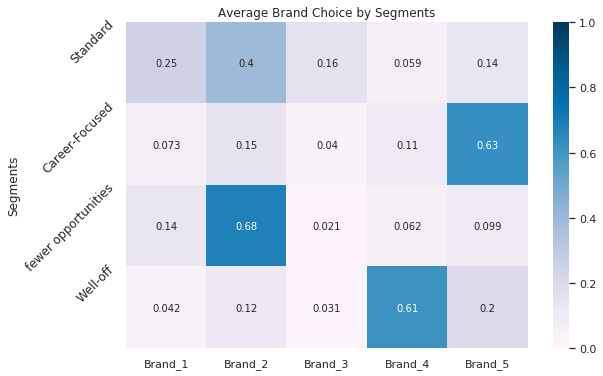

In [33]:
plt.figure(figsize=(9,6))
sns.heatmap(mean_brand_choice,
             annot=True,
             cmap='PuBu',
             vmin=0, 
             vmax=1)
plt.yticks([0,1,2,3],['Standard','Career-Focused','fewer opportunities','Well-off'],rotation=45,fontsize=12)
plt.title('Average Brand Choice by Segments')
plt.show()

## One thing to note the dataset is made such that by order of price brand 5>4>3>2>1

## Fewer opportunities prefering low cost brand,career focused prefering the costliest brand,well off also prefers costly brand,standard does not have any strong preference somewhat prefer low cost brand

## Revenue

In [34]:
temp=df_purchase_predictors[df_purchase_predictors['Brand']==1]
temp.loc[:,'Revenue Brand 1']=temp['Price_1']*temp['Quantity']
segments_brand_revenue=pd.DataFrame()
segments_brand_revenue[['Segments','Revenue Brand 1']]=temp[['Segments','Revenue Brand 1']].groupby(['Segments'],as_index=False).sum()
segments_brand_revenue

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Segments,Revenue Brand 1
0,0,2611.19
1,1,736.09
2,2,2258.90
3,3,699.47


In [35]:
temp=df_purchase_predictors[df_purchase_predictors['Brand']==2]
temp.loc[:,'Revenue Brand 2']=temp['Price_2']*temp['Quantity']
segments_brand_revenue[['Segments','Revenue Brand 2']]=temp[['Segments','Revenue Brand 2']].groupby(['Segments'],as_index=False).sum()
segments_brand_revenue

,Segments,Revenue Brand 1,Revenue Brand 2
0,0,2611.19,4768.52
1,1,736.09,1746.42
2,2,2258.90,13955.14
3,3,699.47,1298.23


In [36]:
temp=df_purchase_predictors[df_purchase_predictors['Brand']==3]
temp.loc[:,'Revenue Brand 3']=temp['Price_3']*temp['Quantity']
segments_brand_revenue[['Segments','Revenue Brand 3']]=temp[['Segments','Revenue Brand 3']].groupby(['Segments'],as_index=False).sum()

In [37]:
temp=df_purchase_predictors[df_purchase_predictors['Brand']==4]
temp.loc[:,'Revenue Brand 4']=temp['Price_4']*temp['Quantity']
segments_brand_revenue[['Segments','Revenue Brand 4']]=temp[['Segments','Revenue Brand 4']].groupby(['Segments'],as_index=False).sum()

In [38]:
temp=df_purchase_predictors[df_purchase_predictors['Brand']==5]
temp.loc[:,'Revenue Brand 5']=temp['Price_5']*temp['Quantity']
segments_brand_revenue[['Segments','Revenue Brand 5']]=temp[['Segments','Revenue Brand 5']].groupby(['Segments'],as_index=False).sum()

In [39]:
segments_brand_revenue['Total Revenue']=(segments_brand_revenue['Revenue Brand 1']+
                                       segments_brand_revenue['Revenue Brand 2']+
                                       segments_brand_revenue['Revenue Brand 3']+
                                        segments_brand_revenue['Revenue Brand 4']+
                                        segments_brand_revenue['Revenue Brand 5'])
segments_brand_revenue

,Segments,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue
0,0,2611.19,4768.52,3909.17,861.38,2439.75,14590.01
1,1,736.09,1746.42,664.75,2363.84,19441.06,24952.16
2,2,2258.90,13955.14,716.25,1629.31,2230.50,20790.10
3,3,699.47,1298.23,731.35,14185.57,5509.69,22424.31


In [40]:
segments_brand_revenue['Segment Proportions']=segm_prop['Segment Proportions']
segments_brand_revenue['Segments']=segments_brand_revenue['Segments'].map({3:'well-off',
                         2:'fewer opportunities',
                         0:'standard',
                         1:'career focused'})
segments_brand_revenue=segments_brand_revenue.set_index(['Segments'])
segments_brand_revenue                                                        

,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue,Segment Proportions
Segments,,,,,,,
standard,2611.19,4768.52,3909.17,861.38,2439.75,14590.01,0.206
career focused,736.09,1746.42,664.75,2363.84,19441.06,24952.16,0.220
fewer opportunities,2258.90,13955.14,716.25,1629.31,2230.50,20790.10,0.378
well-off,699.47,1298.23,731.35,14185.57,5509.69,22424.31,0.196
